<a href="https://colab.research.google.com/github/adamaliwajid/gh1020525/blob/main/business_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Define necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling missing values
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import warnings



In [23]:
# Import the dataset
data = pd.read_csv('/content/creditcard.csv')

In [24]:
data=data.dropna()
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [25]:
# Check the description and information of data
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186283 entries, 0 to 186282
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    186283 non-null  float64
 1   V1      186283 non-null  float64
 2   V2      186283 non-null  float64
 3   V3      186283 non-null  float64
 4   V4      186283 non-null  float64
 5   V5      186283 non-null  float64
 6   V6      186283 non-null  float64
 7   V7      186283 non-null  float64
 8   V8      186283 non-null  float64
 9   V9      186283 non-null  float64
 10  V10     186283 non-null  float64
 11  V11     186283 non-null  float64
 12  V12     186283 non-null  float64
 13  V13     186283 non-null  float64
 14  V14     186283 non-null  float64
 15  V15     186283 non-null  float64
 16  V16     186283 non-null  float64
 17  V17     186283 non-null  float64
 18  V18     186283 non-null  float64
 19  V19     186283 non-null  float64
 20  V20     186283 non-null  float64
 21  V21     186283 

In [26]:
# Calculate the correlation matrix
sample_corr = data.corr(numeric_only=True)[['Amount', 'Class']]
sample_corr


,Amount,Class
Time,-0.008857,-0.011423
V1,-0.232794,-0.137173
V2,-0.544735,0.118680
V3,-0.203057,-0.258477
V4,0.092601,0.152060
V5,-0.372930,-0.136130
V6,0.200465,-0.050335
V7,0.360752,-0.250785
V8,-0.089866,0.026127
V9,-0.031090,-0.111032


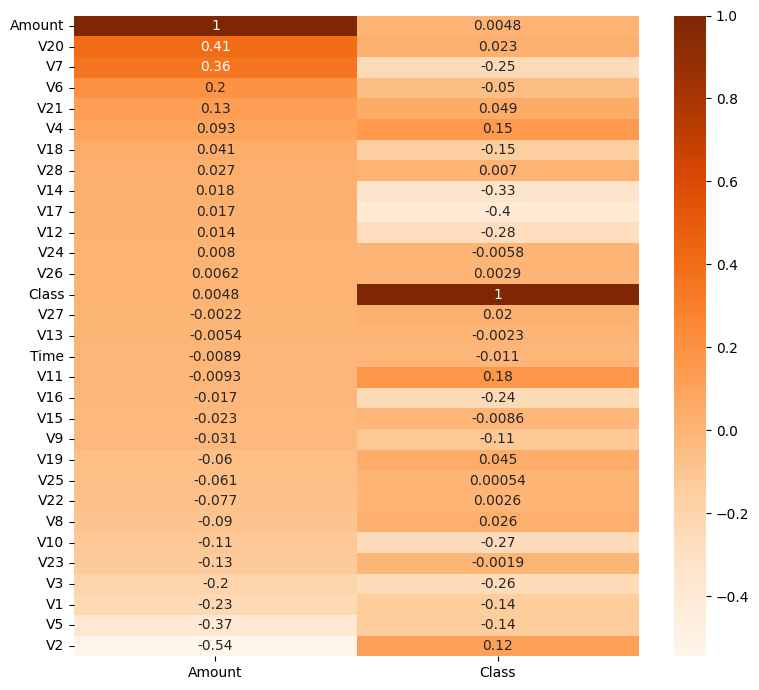

In [27]:
# Plot a heatmap to visualize feature correlations
plt.figure(figsize=(8, 7))
sns.heatmap(data=sample_corr.sort_values(['Amount', 'Class'], ascending=False), annot=True, cmap='Oranges')
plt.tight_layout()


In [28]:
# Define the function to show feature correlation
def show_feature_corr(data: pd.DataFrame, x: str, y: str, figsize: tuple = (6, 3)):
    plt.figure(figsize=figsize)
    sns.scatterplot(data=data, x=x, y=y, hue='Class')
    plt.tight_layout()

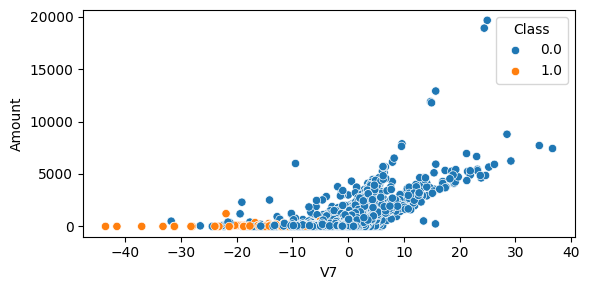

In [29]:
#Visualize feature correlation data using a scatter plot
show_feature_corr(data, 'V7', 'Amount')


Class
0.0    185915
1.0       368
Name: count, dtype: int64

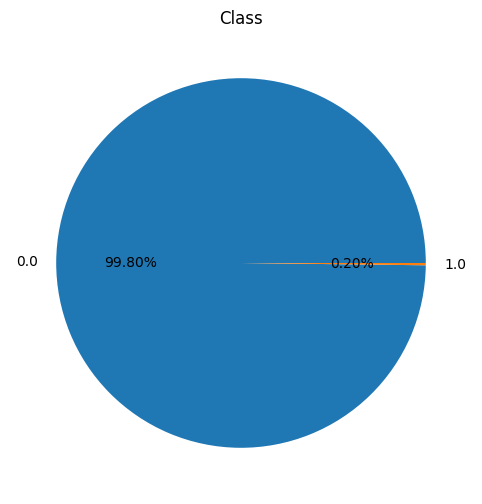

In [30]:
# Visualize the class distribution
plt.figure(figsize=(17, 6))
data['Class'].value_counts().plot(kind='pie', autopct='%0.2f%%', ylabel='', title='Class')
data['Class'].value_counts()

In [31]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x = data.drop(['Class'], axis=1)
y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train[:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
121125,76081.0,-1.306645,0.520767,-0.732448,-0.140784,-2.425837,1.032225,3.710353,-0.417988,-1.334454,...,0.201568,0.012931,0.071863,0.230802,-0.322032,0.366359,1.200998,0.014304,-0.165069,708.95
174343,121870.0,-5.001049,-5.758128,-0.937460,0.426917,1.399444,-0.049466,-0.172047,-0.524115,1.308018,...,-2.712824,-0.593329,1.616458,2.038179,-1.035055,-1.678399,-0.435634,-2.376822,4.968850,38.50
176436,122765.0,-0.711581,0.484197,0.920113,-0.917531,0.957369,-1.374303,0.947256,-0.183693,-0.277024,...,-0.114969,-0.197005,-0.699307,-0.056279,0.030838,-0.138131,0.106706,0.016259,0.125229,1.29
166437,118081.0,-0.713468,0.850950,0.094419,-0.654819,1.259887,-0.789194,0.955370,0.101886,-0.553004,...,0.097030,-0.215404,-0.716343,-0.306658,0.643635,0.866382,0.506516,0.076947,0.004102,11.09
143881,85696.0,-0.680737,0.310382,1.828643,-1.694398,-0.398630,-0.992526,0.656489,-0.227088,-1.754863,...,-0.311151,-0.503205,-1.127965,-0.038188,0.390825,0.121541,0.727901,-0.051815,0.057077,41.94


In [32]:
# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


In [33]:
# Check for missing values in y_test
missing_y_test = y_test.isnull().sum()

if missing_y_test > 0:
    # Handle missing values in y_test, for example, by dropping rows with missing labels
    print(f"Found {missing_y_test} missing values in y_test. Dropping rows with missing labels.")

    # Get the indices of non-missing values in y_test
    valid_indices = ~y_test.isnull()

    # Update y_test and x_test to keep only valid data
    y_test = y_test[valid_indices]
    x_test = x_test[valid_indices]

In [34]:
# Scale the data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()
x_train = msc.fit_transform(x_train)
x_test = msc.transform(x_test)


In [35]:
# Define and fit the Logistic Regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)
yhat_lr = lr.predict(x_test)

In [36]:
# Calculate and display the metrics for Logistic Regression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix


In [37]:
# Calculate the metrics
accuracy_lr = accuracy_score(y_test, yhat_lr)
recall_lr = recall_score(y_test, yhat_lr, average='micro')
precision_lr = precision_score(y_test, yhat_lr, average='micro')
f1_lr = f1_score(y_test, yhat_lr, average='micro')


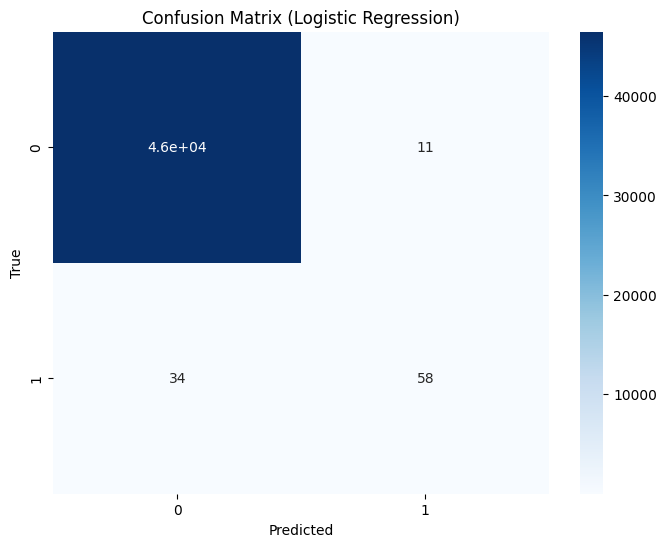

In [38]:
# Display the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, yhat_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


In [39]:
# Print the metrics for Logistic Regression
print("Logistic Regression Metrics:")
print("Accuracy Score: ", accuracy_lr)
print("Recall Score: ", recall_lr)
print("Precision Score: ", precision_lr)
print("F1 Score: ", f1_lr)


Logistic Regression Metrics:
Accuracy Score:  0.9990337334392648
Recall Score:  0.9990337334392648
Precision Score:  0.9990337334392648
F1 Score:  0.9990337334392648


In [40]:
# Import libraries for SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [41]:
# Fit the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(x_train, y_train)


SVC(kernel='linear', random_state=42)

In [42]:
# Predict using the SVM model
y_pred_svm = svm_model.predict(x_test)


In [43]:
# Calculate and display the metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='micro')
precision_svm = precision_score(y_test, y_pred_svm, average='micro')
f1_svm = f1_score(y_test, y_pred_svm, average='micro')


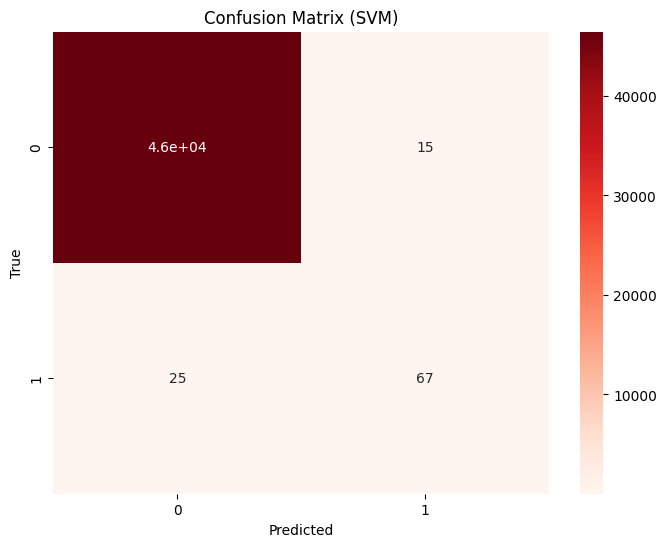

In [44]:
# Display the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM)')
plt.show()

In [45]:
# Print the metrics for SVM
print("SVM Metrics:")
print("Accuracy Score: ", accuracy_svm)
print("Recall Score: ", recall_svm)
print("Precision Score: ", precision_svm)
print("F1 Score: ", f1_svm)


SVM Metrics:
Accuracy Score:  0.9991410963904576
Recall Score:  0.9991410963904576
Precision Score:  0.9991410963904576
F1 Score:  0.9991410963904576
